In [261]:
#import all required modules
import pandas as pd
import numpy as np
from IPython.core.display import display
import seaborn as sns
from _plotly_utils.colors import n_colors
from plotly.subplots import make_subplots
from matplotlib import pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import os
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
if not os.path.exists("Images"):
    os.mkdir("Images")
pd.set_option('display.max_rows',20)




# What Factors Contribute To Owning a Car in Singapore?
<ol>
    <li> What are the most popular brand of cars sold and their respective models? How much do I have to pay for COE?
    <li> What road facilities am I provided with as a car buyer?
    <li>How much are average fuel prices?
    <li>What are the most common accidents? If I get into an accident, what are the average vehicle insurance prices
    <li>After I’m done driving, where do I park my car?

<br>

# Datasets Used

<ol>
    <li>(1) Stats Data per Year cleaned.csv
    <li>(1) Total Cars Sold Per Year Per Brand Sorted by Top cleaned.csv
    <li>(1,2,3) cleaned.csv
    <li>(1) Best Selling Models.csv
    <li>(14) Combined Standard Deviation for COE Premiums and Bid Success Rate cleaned.csv
    <li>(14) All Combined cleaned.csv
    <li>(14) Bid Success Rate All Years cleaned.csv
    <li>(14) Bid Success Rate Standard Deviation cleaned.csv
    <li>(14) COE Premium Standard Deviation cleaned.csv
    <li>(14) COE Premiums Over The Years.csv
    <li> (14) Premium per Category.csv'
    <li>(4) cleaned.csv
    <li>(4) total_cleaned.csv
    <li> (4) Cat Values sorted by Year cleaned.csv
    <li>(5,6) cleaned.csv
    <li>(5,6) total_cleaned.csv
    <li>(7) cleaned.csv
    <li>(8) cleaned.csv
    <li>(8) monthly cleaned.csv
    <li>(9) cleaned.csv
    <li>(9) monthly cleaned.csv
    <li>(10) cleaned.csv
    <li>(11) cleaned.csv
    <li>(12) cleaned.csv
    <li>(13) cleaned.csv




# Visual Analysis for Top Car Brands and Models




## Analysis 1

In [262]:
stats_data = pd.read_csv('./Datasets/Cleaned Data/(1) Stats Data per Year cleaned.csv')
stats_data = stats_data.rename(columns={'Unnamed: 0':'year'}) #rename the column (minor cleaning)
yearly_premiums = pd.read_csv('./Datasets/Cleaned Data/(14) COE Premiums Over The Years.csv')
best_selling_models = pd.read_csv(r'./Datasets/(1) annual-new-registrations-of-cars-by-make/(1) Best Selling Models.csv',thousands=',')
comb_df = pd.read_csv(r'./Datasets/Cleaned Data/(14) Combined Standard Deviation for COE Premiums and Bid Success Rate cleaned.csv')
comb_coe = pd.read_csv(r'./Datasets/Cleaned Data/(14) All Combined cleaned.csv')
cat_specific_coe = pd.read_csv(r'./Datasets/Cleaned Data/(14) Premium per Category.csv')
max_value = stats_data['max']
best_selling_models['Amount'] = max_value
stats_data['Model'] = best_selling_models['Model']
palette = sns.color_palette("icefire", 13).as_hex() #get the hex code

year_total = pd.read_csv('./Datasets/Cleaned Data/(1) Total Cars Sold Per Year Per Brand Sorted by Top cleaned.csv')
year_total = year_total.drop('Unnamed: 0',axis=1)
comb_df = comb_df.drop('Unnamed: 0',axis=1)
yearly_premiums = yearly_premiums.drop('Unnamed: 0',axis=1)
comb_df = comb_df.reindex([4,1,0,2,3])
cat_specific_coe = cat_specific_coe.drop('Unnamed: 0',axis=1)
fig1 = px.violin(year_total,
                 x='Year',y="Count",
                 color='Year',color_discrete_sequence=palette,
                 hover_data=
                 {'Year':True,
                  'Brand':True,
                 },height=700,width=1600)

fig1.add_trace(px.scatter(yearly_premiums, x="Year", y="Average Premium",size='Average Premium').data[0])
fig1.update_traces(mode='lines+markers', marker_color=px.colors.sequential.Viridis,selector=dict(type='scatter'))

fig1.add_trace(px.scatter(stats_data, x="year", y="max", color='max',color_continuous_scale=px.colors.sequential.Viridis,hover_data=
                 {'year':True,
                  'Model':True,
                  'stdev':True,
                  'max': False,
                 },size='max',opacity=0.7).data[0])
fig1.update_traces(marker_color=palette, selector=dict(type='scatter'))

fig1.update_layout(
    title='Year vs Number of Cars Sold Per Brand vs Average COE Premium',
    xaxis=dict(
        title='Distribution of Cars Sold per Brand | Sorted by Year ',
        tickmode='linear')
)

fig1.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=-0.25,
    xanchor="right",
    x=1
))
fig1.data[13].line.color = "#8896AB"
fig1.data[14].line.color = "#8896AB"
fig1.show()

C:\Users\justi\anaconda3\lib\site-packages\numpy\core\numeric.py:2446: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



## Analysis 2



In [263]:
fig = px.scatter(stats_data, x="year", y="max", color='max',color_continuous_scale=px.colors.sequential.Viridis,hover_data=
                 {'year':True,
                  'Model':True,
                  'stdev':True
                 },size='max')
fig.update_layout(height=700,width=1600)
fig.update_layout\
    (
        title='Top Car Models per Year',
        xaxis=dict
            (
            tickmode='linear'
            ),
        yaxis_title = "Number of Cars Built",
        xaxis_title = 'Year'
    )
fig.update_layout(hovermode="x")

fig.show()

## Data Used:


In [264]:
display(stats_data)
display(yearly_premiums)
display(year_total)

,year,max,min > 0,median,stdev,Model
0,2005,31127.0,7.0,24.0,4744,Corolla
1,2006,35326.0,5.0,34.0,5129,Camry
2,2007,27574.0,5.0,69.0,4452,Camry
3,2008,24818.0,5.0,81.0,4338,Camry
4,2009,17555.0,8.0,62.0,2645,Camry
5,2010,6927.0,5.0,51.0,1327,Camry
6,2011,4959.0,7.0,39.5,979,3-Series
7,2012,5039.0,5.0,35.0,1034,3-Series
8,2013,3871.0,6.0,14.5,846,S-Class
9,2014,5431.0,1.0,10.0,1029,Corolla


,Year,Average Premium
0,2005,11253.91
1,2006,8936.65
2,2007,10904.30
3,2008,10868.34
4,2009,10030.52
5,2010,28551.98
6,2011,42634.92
7,2012,58262.98
8,2013,59155.83
9,2014,53837.51


,Year,Count,Brand
0,2005,31127.0,Toyota
1,2005,17034.0,Nissan
2,2005,12860.0,Hyundai
3,2005,11274.0,Honda
4,2005,6422.0,Mitsubishi
...,...,...,...
896,2017,0.0,Toyo Ace
897,2017,0.0,Wuling
898,2017,0.0,Zotye
899,2017,0.0,Others


# Visual Analysis for COE Premiums

## Analysis 3

In [265]:


colors = n_colors('rgb(5, 200, 200)', 'rgb(200, 10, 10)', 5, colortype='rgb')

fig = go.Figure()

categories = np.unique(comb_coe['Category'])
order = [3,2,0,1,4]
categories = [categories[i] for i in order]
cat_premium = {}
cat_list = []

for category in categories:
    coe_values = []
    for i in range(len(comb_coe[comb_coe['Category']==category]['Quota Premium'])):
        value = np.array(comb_coe[comb_coe['Category']==category]['Quota Premium'])[i]
        coe_values.append(value)
    cat_premium[category] = coe_values


for key, value in cat_premium.items():
    cat_list.append(value)

rank = 5000
fig = go.Figure()
for data_line, color,category in zip(cat_list, colors,categories):
    fig.add_trace(go.Violin(x=data_line, line_color=color,name=category, legendrank=rank))

fig.update_traces(orientation='h', side='positive', width=3, points=False)
fig.update_layout(xaxis_showgrid=False, xaxis_zeroline=False,height=700,width=1600)
fig.update_traces(showlegend=True,legendgrouptitle_text='COE Category', selector=dict(type='violin'))
fig.update_layout(legend_traceorder="reversed")
fig.update_layout(hovermode="x")
fig.update_layout\
    (
        title='Distribution of COE Premiums per Category',
        yaxis_title = "Category Type",
        xaxis_title = "COE Premium ($)"
    )

fig.show()

## Analysis 4

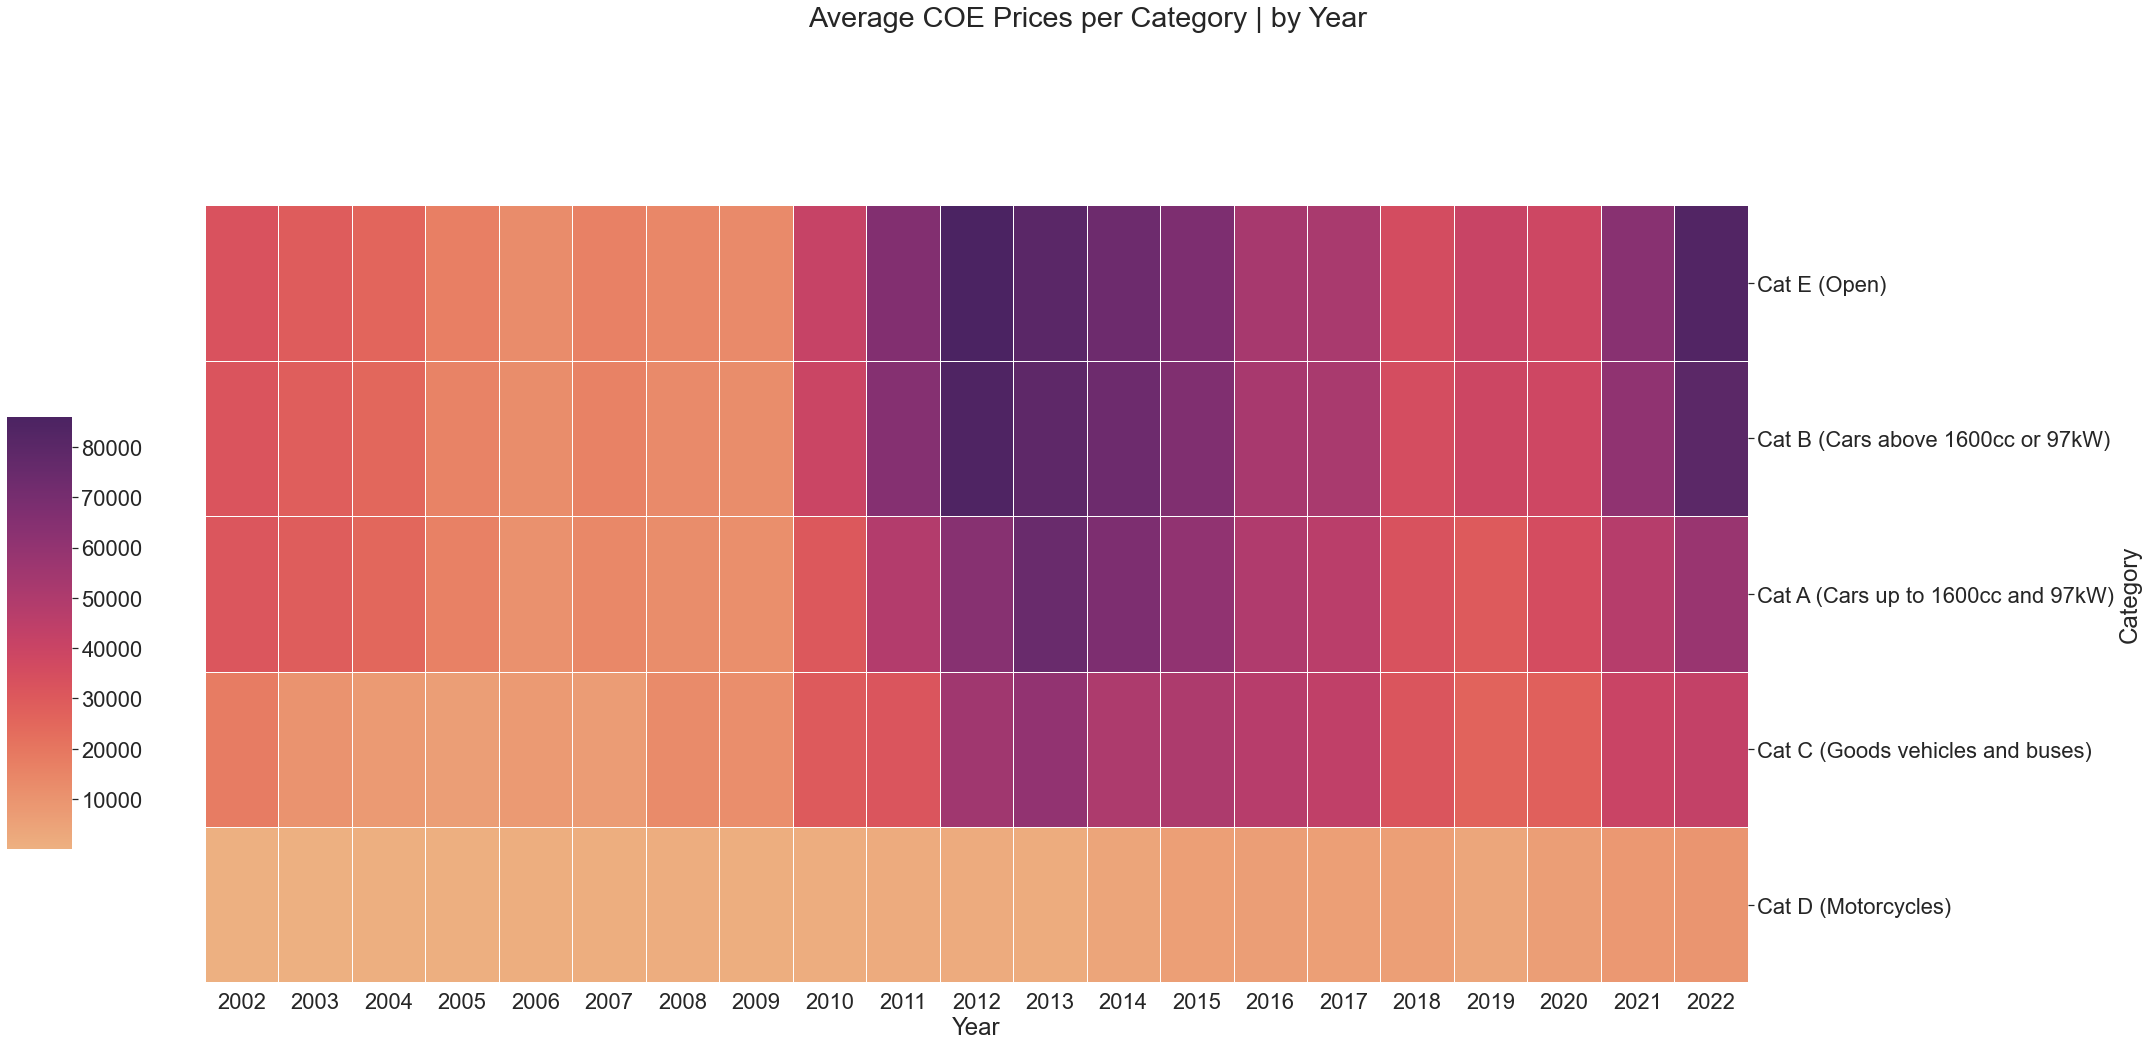

In [266]:
coe_distribution =pd.read_csv('./Datasets/Cleaned Data/(14) All Combined cleaned.csv')
coe_distribution = coe_distribution.drop(columns=["Unnamed: 0",'Quota','Total Bids Received','Number of Successful Bids'])

coe_distribution = (coe_distribution.reset_index())
coe_distribution = coe_distribution.drop(columns=["index"])
result = coe_distribution.pivot_table(index='Category', columns='Year', values='Quota Premium')
result = result.reindex(["Cat E (Open)", "Cat B (Cars above 1600cc or 97kW)", "Cat A (Cars up to 1600cc and 97kW)","Cat C (Goods vehicles and buses)","Cat D (Motorcycles)"])
sns.set(font_scale = 2)
a = sns.clustermap(result, cmap='flare', figsize=(30, 15),
                   dendrogram_ratio=(.1, .2),
                   row_cluster=False,
                   col_cluster = False,
                   cbar_pos=(0, .2, .03, .4),linewidths=1,)
a.fig.suptitle('Average COE Prices per Category | by Year', y=0.98)


# a.yaxis.set_ticks_position("left")
# a.set_title("Price of COE Premiums by Category | Per Year", fontsize = 30)

plt.show()


### Data Used:


In [267]:
display(comb_coe)
display(comb_df)



,Unnamed: 0,Year,Category,Quota,Quota Premium,Total Bids Received,Number of Successful Bids
0,0,2022,Cat A (Cars up to 1600cc and 97kW),531,57898,711,526
1,1,2022,Cat A (Cars up to 1600cc and 97kW),543,57599,760,533
2,2,2021,Cat A (Cars up to 1600cc and 97kW),534,58801,740,534
3,3,2021,Cat A (Cars up to 1600cc and 97kW),536,57010,771,525
4,4,2021,Cat A (Cars up to 1600cc and 97kW),537,55001,706,535
...,...,...,...,...,...,...,...
2345,2345,2002,Cat E (Open),910,30801,1377,905
2346,2346,2002,Cat E (Open),1097,27999,1663,1083
2347,2347,2002,Cat E (Open),1095,28005,1445,1094
2348,2348,2002,Cat E (Open),1105,28487,1477,1101


,Category,Premium Standard Deviation,Success Rate Standard Dev
4,Cat E (Open),"$24,282.03",8.7
1,Cat B (Cars above 1600cc or 97kW),"$24,022.49",11.2
0,Cat A (Cars up to 1600cc and 97kW),"$20,011.51",12.9
2,Cat C (Goods vehicles and buses),"$18,438.91",11.9
3,Cat D (Motorcycles),"$2,673.49",10.8


# Visual Analysis for Construction of Roads and  Roadside Facilities

## Analysis 5

In [294]:
palette = px.colors.qualitative.Alphabet
palette[2] = '#68D6C8'

facilities_by_cat = pd.read_csv(r'./Datasets/Cleaned Data/(4) cleaned.csv')
total_facilities_by_year = pd.read_csv(r'./Datasets/Cleaned Data/(4) total_cleaned.csv')
cat_values_by_year = pd.read_csv(r'./Datasets/Cleaned Data/(4) Cat Values sorted by Year cleaned.csv')
cat_values_by_year = cat_values_by_year.rename(columns={'Unnamed: 0':'Year'}) #rename the column (minor cleaning)
facilities_by_cat = facilities_by_cat.drop('Unnamed: 0',axis=1)
total_facilities_by_year = total_facilities_by_year.drop('Unnamed: 0',axis=1)
local_road =  facilities_by_cat[facilities_by_cat['Road Type'] == 'Local Road']
facilities_by_cat = facilities_by_cat[facilities_by_cat['Road Type'] != 'Local Road']
local_road = local_road.reset_index()
local_road = local_road.drop('index',axis=1)
total_facilities_by_year['Local Roads Total'] = local_road['Road Length']


fig = make_subplots(specs=[[{"secondary_y": True}]])
range_list = np.arange(0,3)
for i, color in zip(range_list,palette):
    fig.add_trace(px.line(facilities_by_cat, x="Year", y="Road Length", color='Road Type').data[i],secondary_y=False)
    fig['data'][i]['line']['color']=palette[i]
    fig['data'][i]['showlegend'] = False

fig.update_traces(hovertemplate=None,hoverinfo='skip')
fig.update_layout(height=700,width=1600)
fig.update_layout\
    (
        title='Growth of Facilities Built per Year | By Type',
        xaxis=dict
            (
                tickmode='linear'
            ),

    )
fig.update_layout\
    (
        xaxis_title = "Year of Completion"
    )
fig.update_layout(xaxis_showgrid=False, xaxis_zeroline=False,yaxis_showgrid=False, yaxis_zeroline=False)


for i in range(3):
    fig.add_trace(px.bar(facilities_by_cat, x="Year", y="Road Length",color='Road Type',color_discrete_sequence=palette,opacity=0.2, text="Road Type").data[i],secondary_y=False)

fig.update_traces(textfont_size=10, textangle=0, textposition="inside",textfont_color='black' ,cliponaxis=False,selector=dict(type='bar'))

fig.update_layout(barmode='stack', yaxis_title = "Total Number of Facilities Built")
fig.update_layout(hovermode="x")

fig.show()


## Analysis 6

In [269]:
fig = px.scatter(local_road, x="Year", y="Road Length", color='Road Length',color_continuous_scale=[[0.0, '#01cdfe'], [1.0, '#ff71ce']],size='Road Length',opacity=1,trendline="ols", trendline_color_override="grey")
fig.update_layout(height=700,width=1600)
fig.update_layout\
    (
        title='Length of Local Road Built | Per Year',
        xaxis=dict(
            tickmode='linear'),
        yaxis_title = "Road Length | Km",
        xaxis_title = "Year of Completion"

    )
fig.update_layout(hovermode="x")

fig.show()

## Analysis 7

In [270]:
fig = px.scatter(total_facilities_by_year, x=['Local Roads Total','Total'], y='Year', labels={'variable':'Disparity'})
fig.update_layout(title_text = "Length of Local Road Built vs Length of Total Road Built | By Year",
    xaxis_title = "Road Length | Km",
    margin_l = 65)
for i in range(total_facilities_by_year.shape[0]):
    fig.add_shape(
        type='line',
        x0=total_facilities_by_year['Local Roads Total'].iloc[i], y0=total_facilities_by_year['Year'].iloc[i],
        x1=total_facilities_by_year['Total'].iloc[i], y1=total_facilities_by_year['Year'].iloc[i],
        line_color="#cccccc"
    )
fig.update_layout(height=700,width=1600, yaxis=dict(
            tickmode='linear'))
fig.update_layout(hovermode="x")

fig.show()

## Analysis 8

In [297]:
palette = ['#003f5c','#58508d','#ff6361','#ffa600']
facilities_by_type = pd.read_csv(r'./Datasets/Cleaned Data/(5,6) cleaned.csv')
facilities_by_type_total = pd.read_csv(r'./Datasets/Cleaned Data/(5,6) total_cleaned.csv')
facilities_by_type_total = facilities_by_type_total.drop('Unnamed: 0',axis=1)

fig = make_subplots(specs=[[{"secondary_y": True}]])
range_list = np.arange(0,5)
for i, color in zip(range_list,palette):
    fig.add_trace(px.area(facilities_by_type, x="Year", y="Count", color='Type of Facility').data[i])
    fig['data'][i]['line']['color']=palette[i]

palette1 = sns.color_palette("Spectral", 24).as_hex()
palette1 = list(reversed(palette1))
fig.add_trace(px.scatter(facilities_by_type_total, x="Year", y="Total",size='Total',opacity=1,trendline="ols", trendline_color_override="grey",hover_data=
                 {'Total':True,
                 }).data[0],secondary_y=True)
fig.update_traces(marker_color=palette1,selector=dict(type='scatter'))

fig.update_layout(height=700,width=1600)
fig.update_layout\
    (
        title='Total Number of Roadside Facilities Built per Year | By Type',
        xaxis=dict
            (
                tickmode='linear'
            ),
        xaxis_title = "Year Built"
        ,yaxis_title = "Total Number of Facilities Built"

    )

fig.update_traces(textfont_size=12, textangle=0, textposition="inside",textfont_color='black' ,cliponaxis=False,selector=dict(type='bar'))
fig.update_layout(barmode='stack')
fig.update_layout(autosize=True)
fig.update_layout(legend_orientation="h")
fig.update_layout(hovermode="x")
fig.show()




## Analysis 9

In [272]:
traffic_light =  facilities_by_type[facilities_by_type['Type of Facility'] == 'Traffic Lights']
facilities_by_type = facilities_by_type[facilities_by_type['Type of Facility'] != 'Traffic Lights']
traffic_light = traffic_light.reset_index()
traffic_light = traffic_light.drop('index',axis=1)
fig = px.scatter(traffic_light, x="Year", y="Count", color='Count',color_continuous_scale=[[0.0, '#01cdfe'], [1.0, '#ff71ce']],size='Count',opacity=1,trendline="ols", trendline_color_override="grey")
fig.update_layout(height=700,width=1600)
fig.update_layout\
    (
        title='Length of Traffic Lights Built | Per Year',
        xaxis=dict(
            tickmode='linear'),
        yaxis_title = "Count | Km"
    )
fig.update_layout(hovermode="x")
fig.show()

### Data Used:


In [273]:
display(facilities_by_cat)
display(facilities_by_type)

,Year,Road Type,Road Length
1,2005,Arterial Road,594
2,2005,Collector Road,455
3,2005,Expressway,150
5,2006,Arterial Road,604
6,2006,Collector Road,468
...,...,...,...
46,2016,Collector Road,585
47,2016,Expressway,164
49,2017,Arterial Road,704
50,2017,Collector Road,576


,Year,Type of Facility,Count
0,1994,ERP Gantries,0
1,1994,Vehicular Underpasses & Tunnels,10
2,1994,Flyovers,79
3,1994,Vehicular Bridges,180
5,1995,ERP Gantries,0
...,...,...,...
113,2016,Vehicular Bridges,220
115,2017,Vehicular Underpasses & Tunnels,32
116,2017,ERP Gantries,78
117,2017,Flyovers,124


# Visual Analysis for Fuel Prices


## Analysis 10

C:\Users\justi\AppData\Local\Temp/ipykernel_4252/99536849.py:22: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\justi\AppData\Local\Temp/ipykernel_4252/99536849.py:28: UserWarning:

FixedFormatter should only be used together with FixedLocator



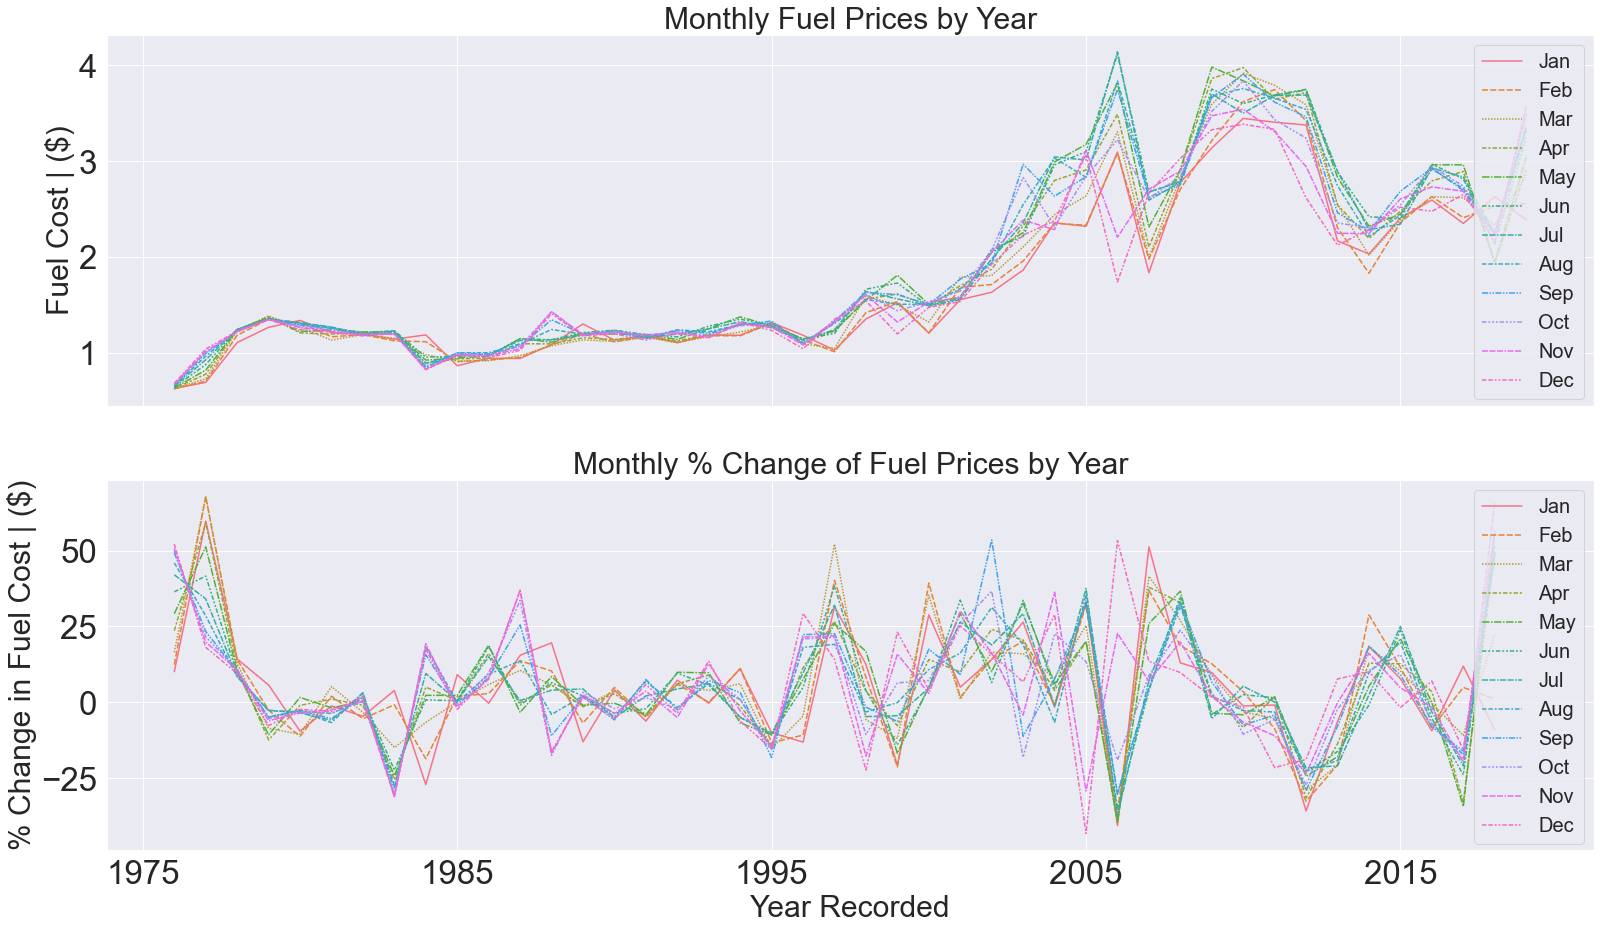

In [274]:
palette = sns.color_palette("hls", 12).as_hex()
fuel_yearly = pd.read_csv(r'./Datasets/Cleaned Data/(8) cleaned.csv')
fuel_monthly = pd.read_csv(r'./Datasets/Cleaned Data/(8) monthly cleaned.csv')
percentage_yearly = pd.read_csv(r'./Datasets/Cleaned Data/(9) cleaned.csv')
percentage_monthly = pd.read_csv(r'./Datasets/Cleaned Data/(9) monthly cleaned.csv')
fuel_max = pd.read_csv(r'./Datasets/Cleaned Data/(8) monthly indexed.csv')
percentage_max = pd.read_csv(r'./Datasets/Cleaned Data/(9) monthly indexed.csv')

fuel_yearly = fuel_yearly.drop(columns='Unnamed: 0') #rename the column (minor cleaning)
fuel_monthly = fuel_monthly.drop(columns='Unnamed: 0') #rename the column (minor cleaning)
percentage_yearly = percentage_yearly.drop(columns='Unnamed: 0') #rename the column (minor cleaning)
percentage_monthly = percentage_monthly.drop(columns='Unnamed: 0')
percentage_max = percentage_max.drop(columns='Unnamed: 0') #rename the column (minor cleaning)
fuel_max = fuel_max.drop(columns='Unnamed: 0') #rename the column (minor cleaning)

monthly_names = list(fuel_monthly.columns)
del monthly_names[0]

sns.set(font_scale = 3)
fig, axes = plt.subplots(2, 1,sharex=True, figsize=(26.65,15))
lineplot1 = sns.lineplot(ax=axes[0],data=fuel_monthly)
lineplot1.set(xticklabels=[0,1975,1985,1995,2005,2015])
lineplot1.set_xlabel("Year Recorded", fontsize = 30)
lineplot1.set_ylabel("Fuel Cost | ($)", fontsize = 30)
lineplot1.set_title("Monthly Fuel Prices by Year", fontsize = 30)
lineplot1.legend(fontsize = 20)
lineplot2 = sns.lineplot(ax=axes[1],data=percentage_monthly)
lineplot2.set(xticklabels=[0,1975,1985,1995,2005,2015])
lineplot2.set_xlabel("Year Recorded", fontsize = 30)
lineplot2.set_ylabel("% Change in Fuel Cost | ($)", fontsize = 30)
lineplot2.set_title("Monthly % Change of Fuel Prices by Year", fontsize = 30)
lineplot2.legend(fontsize = 20)
plt.show()


## Analysis 11

In [275]:
year_unique = np.unique(fuel_max['Year'])


year_max = {}

for year in year_unique:
    data = fuel_max.loc[fuel_max['Year'] == year,['Month','value']]
    month = np.array(data.loc[data['value'] == data['value'].max(),'Month'])
    max1 = np.array(data.loc[data['value'] == data['value'].max(),'value'])
    year_max[year] = {'Month':month[0],'max':max1[0]}

year_max = pd.DataFrame.from_dict(year_max).transpose()
year_max = year_max.reset_index()
year_max.rename(columns={year_max.columns[0]: "Year" }, inplace = True)


year_unique = np.unique(percentage_max['Year'])

year_max_2 = {}

for year in year_unique:
    data = percentage_max.loc[percentage_max['Year'] == year,['Month','value']]
    month = np.array(data.loc[data['value'] == data['value'].max(),'Month'])
    max1 = np.array(data.loc[data['value'] == data['value'].max(),'value'])
    year_max_2[year] = {'Month':month[0],'max':max1[0]}

year_max_2 = pd.DataFrame.from_dict(year_max_2).transpose()
year_max_2 = year_max_2.reset_index()
year_max_2.rename(columns={year_max_2.columns[0]: "Year" }, inplace = True)


months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

palette_dict = dict(zip(months,palette))
year_max = year_max.astype({"max": float})
year_max_2 = year_max_2.astype({"max": float})
fig = px.scatter(year_max, x="Year", y="max",color='Month',color_discrete_map=palette_dict,size='max',opacity=1,hover_data=
                 {'Month':True,
                 })
fig.update_layout(height=700,width=1600)
fig.update_layout(hovermode="x")
fig.update_layout\
    (
        title='Most Expensive Month for Fuel Prices | By Year',
        xaxis=dict(
            tickmode='linear'),
        yaxis_title = "Price | ($)"
    )
fig.update_yaxes(showline=True, linewidth=2, linecolor='grey',zerolinecolor='grey')
fig.update_layout(xaxis_showgrid=False)

fig.show()

## Analysis 12


In [276]:

fig = px.scatter(year_max_2, x="Year", y="max",color='Month',color_discrete_map=palette_dict,size=abs(year_max_2['max']),opacity=1,hover_data=
                 {'Month':True,
                 })
fig.update_layout(height=800,width=1600)
fig.update_layout(hovermode="x")
fig.update_layout\
    (
        title='Largest % Change Difference From Previous Month | By Year',
        xaxis=dict(
            tickmode='linear'),
        yaxis_title = "Price | ($)",
    )
fig.update_yaxes(showline=True, linewidth=2, linecolor='grey',zerolinecolor='grey')
fig.update_layout(xaxis_showgrid=False)
fig.show()


## Analysis 13


In [277]:
engine_type = pd.read_csv(r'./Datasets/Cleaned Data/(7) cleaned.csv')

fig = make_subplots(specs=[[{"secondary_y": True}]])


fig.add_trace(px.line(engine_type,x='Year',y='Count',color='Engine Type').data[0],secondary_y=True)
fig.add_trace(px.area(engine_type,x='Year',y='Count',color='Engine Type').data[1],secondary_y=False)
fig.add_trace(px.area(engine_type,x='Year',y='Count',color='Engine Type').data[2],secondary_y=False)

fig.update_layout(height=700,width=1600)
fig.update_layout(
    title='Cars Sold per Engine Type | Sorted by Year ',
    xaxis=dict(
        tickmode='linear')
)
fig.update_layout\
    (
        yaxis_title = "Number of Cars Sold",
        xaxis_title = "Year of Sale"

    )
fig.update_yaxes(tickfont=dict( color='blue'),secondary_y=True)
fig.update_yaxes(range=[0,70000],secondary_y=False)
fig.update_layout(yaxis_showgrid=False)
fig.update_layout(hovermode="x")
fig.update_layout(legend_orientation="h")
fig.show()


display(engine_type)

,Year,Engine Type,Count
0,2006,Petrol,471707
1,2006,Diesel,7
2,2006,Petrol-Electric,379
3,2007,Petrol,513375
4,2007,Diesel,4
...,...,...,...
34,2017,Diesel,15514
35,2017,Petrol-Electric,20751
36,2018,Petrol,569673
37,2018,Diesel,17253


### Data Used:


In [278]:
display(fuel_max)
display(percentage_max)
display(year_max)
display(year_max_2)


,Year,Month,value
0,1978,Jan,0.631
1,1978,Feb,0.629
2,1978,Mar,0.629
3,1978,Apr,0.631
4,1978,May,0.637
...,...,...,...
523,2021,Aug,3.351
524,2021,Sep,3.361
525,2021,Oct,3.477
526,2021,Nov,3.576


,Year,Month,value
0,1979,Jan,10.1
1,1979,Feb,12.4
2,1979,Mar,16.5
3,1979,Apr,23.6
4,1979,May,29.2
...,...,...,...
511,2021,Aug,49.3
512,2021,Sep,48.7
513,2021,Oct,56.1
514,2021,Nov,65.6


,Year,Month,max
0,1978,Dec,0.685
1,1979,Dec,1.042
2,1980,Jul,1.247
3,1981,Mar,1.388
4,1982,Jan,1.341
...,...,...,...
39,2017,Sep,2.688
40,2018,Jun,2.970
41,2019,May,2.963
42,2020,Jan,2.631


,Year,Month,max
0,1979,Dec,52.1
1,1980,Feb,67.8
2,1981,Jan,14.3
3,1982,Jan,5.7
4,1983,May,1.6
...,...,...,...
38,2017,Feb,28.8
39,2018,Jul,25.0
40,2019,Dec,7.0
41,2020,Jan,11.9


# Visual Analysis of Accident Types,Causes and Insurance Data
## Analysis 14

In [298]:
accident_type = pd.read_csv(r'./Datasets/Cleaned Data/(10) cleaned.csv')
fig = px.sunburst(accident_type, path=['accident_classification', 'Road User Group', 'Cause of Accident'], values='Number of Accidents',color="Number of Accidents",color_continuous_scale=px.colors.sequential.Viridis_r)
fig.update_layout(height=700,width=1600)
fig.update_layout\
    (
        title='Distribution of Accident Types and Accident Causes and Average Occurrences per Year',
    )
fig.update_layout\
    (
        yaxis_title = "Number of Cars Sold",
        xaxis_title = "Year of Sale"

    )
fig.show()


## Analysis 15

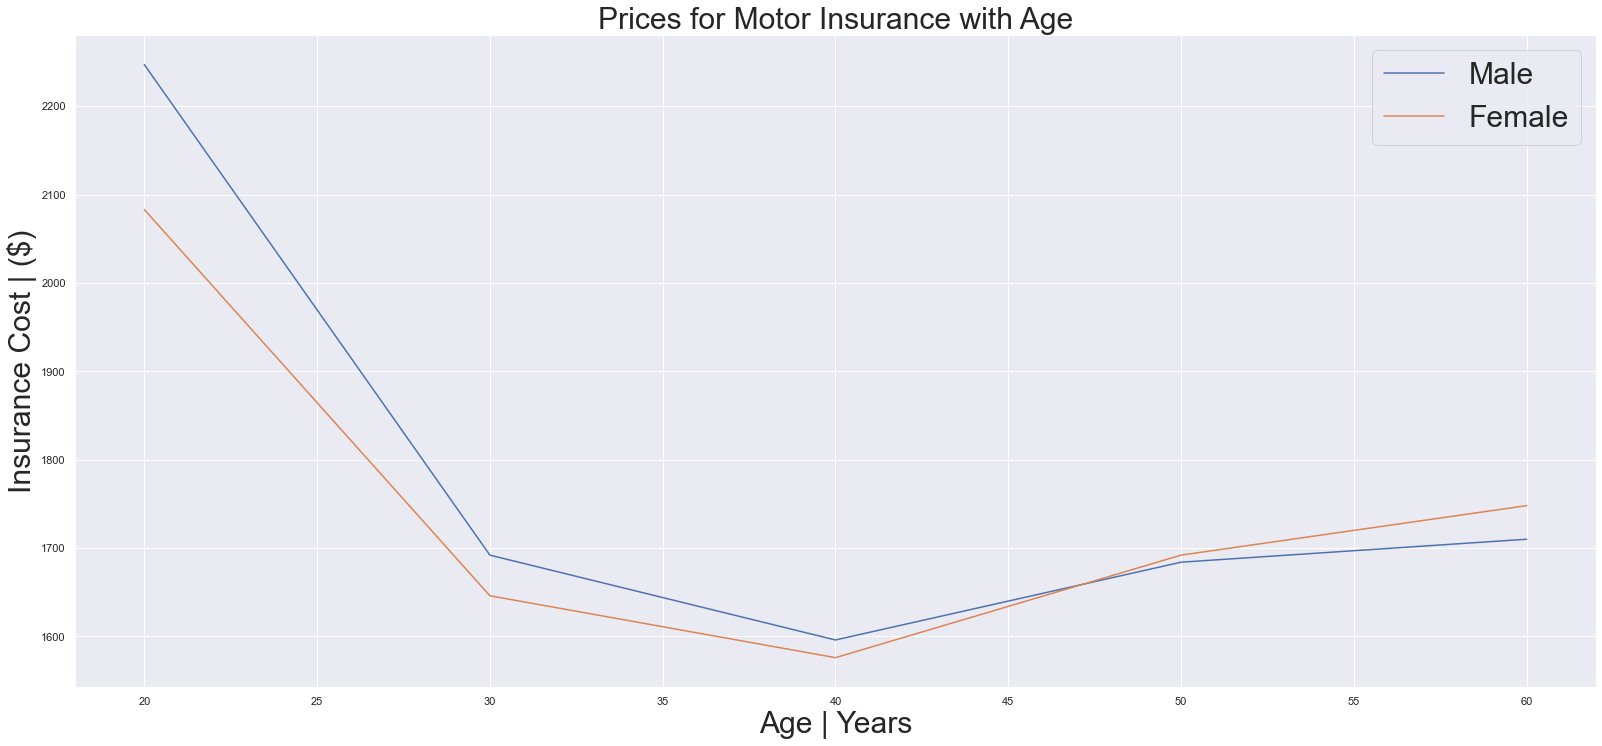

In [280]:
insurance_data = pd.read_csv('./Datasets/Cleaned Data/(11) cleaned.csv')
sns.set(rc={'figure.figsize':(27.25,12)})
p = sns.lineplot(data=insurance_data, x="Driver's Age", y="Average Cost", hue="Sex")
sns.set(font_scale = 2)
p.set_xlabel("Age | Years", fontsize = 30)
p.set_ylabel("Insurance Cost | ($)", fontsize = 30)
p.set_title("Prices for Motor Insurance with Age", fontsize = 30)
plt.legend(fontsize = 30)
plt.show()

### Data Used


In [281]:
display(accident_type)
display(insurance_data)


,Year,accident_classification,Road User Group,Cause of Accident,Number of Accidents
0,2012,FATAL,Pedestrians,Failing to Keep a Proper Lookout,59
1,2012,INJURY,"Drivers, Riders or Cyclists",Failing to Keep a Proper Lookout,2710
2,2013,FATAL,"Drivers, Riders or Cyclists",Failing to Keep a Proper Lookout,53
3,2013,INJURY,"Drivers, Riders or Cyclists",Under the Influence of Alcohol,2398
4,2014,FATAL,"Drivers, Riders or Cyclists",Failing to Keep a Proper Lookout,55
5,2014,INJURY,"Drivers, Riders or Cyclists",Failing to Keep a Proper Lookout,2459
6,2015,FATAL,"Drivers, Riders or Cyclists",Failing to Keep a Proper Lookout,58
7,2015,INJURY,"Drivers, Riders or Cyclists",Failing to Keep a Proper Lookout,2592
8,2016,FATAL,"Drivers, Riders or Cyclists",Failing to Keep a Proper Lookout,42
9,2016,INJURY,"Drivers, Riders or Cyclists",Failing to Keep a Proper Lookout,2742


,Unnamed: 0,Driver's Age,Sex,Average Cost
0,0,20,Male,2247
1,1,20,Female,2083
2,2,30,Male,1692
3,3,30,Female,1646
4,4,40,Male,1596
5,5,40,Female,1576
6,6,50,Male,1684
7,7,50,Female,1692
8,8,60,Male,1710
9,9,60,Female,1748


# Visual Analysis for Car Park Information

## Analysis 16

In [285]:
lots_available = pd.read_csv('./Datasets/Cleaned Data/(12) cleaned.csv')

fig = px.scatter(lots_available,x='total_lots',y='lots_available', marginal_x="histogram",color='lots_available', marginal_y="histogram",trendline='ols',trendline_color_override='grey')
fig.update_layout(height=700,width=1600)
fig.update_layout\
    (
        title='Total Lots Available For Public Parking vs Total Lots Present',
        yaxis_title = "Lots Available for Public Parking",
        xaxis_title = "Lots Present in Car Park",
    )

fig.show()



## Analysis 17

In [283]:
sankey_distribution = pd.read_csv('./Datasets/Cleaned Data/(13) final cleaned.csv')
sankey_distribution = sankey_distribution.drop(columns=["Unnamed: 0"])


car_park_type = (np.unique(sankey_distribution['car_park_type']))
car_park_type_palette = sns.color_palette("hls", len(car_park_type)).as_hex()
car_park_type_palette_rgba = [i+'80' for i in car_park_type_palette]

parking_system_type = (np.unique(sankey_distribution['type_of_parking_system']))
parking_system_type_palette = sns.color_palette("hls", len(parking_system_type)).as_hex()
parking_system_type_palette_rgba = [i+'80' for i in parking_system_type_palette]

car_park_decks = (np.unique(sankey_distribution['car_park_decks']))
car_park_decks_palette = sns.color_palette("hls", len(car_park_decks)).as_hex()
car_park_decks_palette_rgba = [i+'80' for i in car_park_decks_palette]


rgba_nodes = []
car_park_type_nodes = []
nodes_dict = {}
rgba_dict ={}

for i in range(len(car_park_type)):
    car_park_type_nodes.append([i,car_park_type[i],car_park_type_palette[i]])
    rgba_nodes.append([car_park_type[i],car_park_type_palette_rgba[i]])


for i in range(len(parking_system_type)):
    car_park_type_nodes.append([i,parking_system_type[i],parking_system_type_palette[i]])
    rgba_nodes.append([parking_system_type[i],parking_system_type_palette_rgba[i]])

for i in range(len(car_park_decks)):
    car_park_type_nodes.append([i,car_park_decks[i],car_park_decks_palette[i]])
    rgba_nodes.append([car_park_decks[i],car_park_decks_palette_rgba[i]])

car_park_type_nodes = np.array(car_park_type_nodes)
rgba_nodes = np.array(rgba_nodes)


for i in range(len(car_park_type_nodes)):
    car_park_type_nodes[i][0] = i
    nodes_dict[ car_park_type_nodes[i][1]] = i
    rgba_dict[car_park_type_nodes[i][1]] =rgba_nodes[i][1]



car_park_nodes_df = pd.DataFrame(car_park_type_nodes,columns=['ID','Label','Color'])

rgba_nodes_df = pd.DataFrame(rgba_nodes,columns=['Label','Color'])

links =[]


for ctype in car_park_type:
    source = nodes_dict[ctype]
    data = sankey_distribution.loc[sankey_distribution['car_park_type'] == ctype,['car_park_type','type_of_parking_system']]
    distinct = pd.Series(data['type_of_parking_system'].value_counts())
    distinct = pd.DataFrame({'type_of_parking_system':distinct.index,'count':distinct.values})


    for i in range(len(distinct['type_of_parking_system'])):
        target = nodes_dict[distinct['type_of_parking_system'][i]]
        value = distinct['count'][i]
        color = rgba_dict[ctype]
        links.append([source,target,value,color])

for ptype in parking_system_type:
    source = nodes_dict[ptype]
    data = sankey_distribution.loc[sankey_distribution['type_of_parking_system'] == ptype,['type_of_parking_system','car_park_decks']]
    distinct = pd.Series(data['car_park_decks'].value_counts())
    distinct = pd.DataFrame({'car_park_decks':distinct.index,'count':distinct.values})


    for i in range(len(distinct['car_park_decks'])):
        target = nodes_dict[str(distinct['car_park_decks'][i])]
        value = distinct['count'][i]
        color = rgba_dict[ptype]
        links.append([source,target,value,color])

links_df = pd.DataFrame(links,columns=['Source','Target','Value','Color'])
data_trace = dict(
    type='sankey',
    domain = dict(
      x =  [0,1],
      y =  [0,1]
    ),
    orientation = "h",
    valueformat = ".0f",
    node = dict(
      pad = 10,
      thickness = 30,
      line = dict(
        color = "black",
        width = 0
      ),
      label =  car_park_nodes_df['Label'].dropna(axis=0, how='any'),
      color = car_park_nodes_df['Color']
    ),
    link = dict(
      source = links_df['Source'].dropna(axis=0, how='any'),
      target = links_df['Target'].dropna(axis=0, how='any'),
      value = links_df['Value'].dropna(axis=0, how='any'),
      color = links_df['Color'].dropna(axis=0, how='any'),
    )
)

layout =  dict(
    title = "Different Car Park Types and Facilities",
    height = 800,
    width=1600,
    font = dict(
      size = 10
    ),
)

fig = dict(data=[data_trace], layout=layout)
iplot(fig, validate=False)

### Data Used:


In [284]:
display(lots_available)
display(sankey_distribution)


,Unnamed: 0,total_lots,lots_available
0,0,105,27
1,1,583,335
2,2,329,160
3,3,97,55
4,4,96,49
...,...,...,...
1931,1958,6,0
1932,1959,306,105
1933,1960,195,121
1934,1961,229,148


,car_park_type,type_of_parking_system,short_term_parking,free_parking,night_parking,car_park_decks,gantry_height,car_park_basement
0,BASEMENT CAR PARK,ELECTRONIC PARKING,7AM-10.30PM,NO,NO,1,2.15,Y
1,BASEMENT CAR PARK,ELECTRONIC PARKING,7AM-10.30PM,NO,NO,1,2.15,Y
2,BASEMENT CAR PARK,ELECTRONIC PARKING,7AM-10.30PM,NO,NO,1,2.15,Y
3,BASEMENT CAR PARK,ELECTRONIC PARKING,7AM-10.30PM,NO,NO,1,2.15,Y
4,BASEMENT CAR PARK,ELECTRONIC PARKING,7AM-10.30PM,NO,NO,1,2.15,Y
...,...,...,...,...,...,...,...,...
2166,SURFACE/MULTI-STOREY CAR PARK,ELECTRONIC PARKING,WHOLE DAY,NO,YES,8,2.00,N
2167,SURFACE/MULTI-STOREY CAR PARK,ELECTRONIC PARKING,WHOLE DAY,NO,YES,8,2.00,N
2168,SURFACE/MULTI-STOREY CAR PARK,ELECTRONIC PARKING,WHOLE DAY,NO,YES,8,2.15,N
2169,SURFACE/MULTI-STOREY CAR PARK,ELECTRONIC PARKING,WHOLE DAY,NO,YES,8,2.15,N


#### Total Graphs Created: 17
# Brought to you by: Justin Wong
